<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/numpyforaiml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌸 NumPy for AIML-Ready
## A Complete Beginner Project using the Real Iris Dataset

**Objective:** This notebook teaches NumPy from scratch using a real-world dataset. By the end, you will be comfortable using NumPy for AI/ML data processing.

---
### What you will learn
- What is NumPy and why it is used in AI/ML
- How to create and inspect NumPy arrays
- Indexing, slicing, and boolean masking
- Vectorized operations and broadcasting
- Basic statistics with NumPy
- Loading a real CSV dataset
- Feature normalization
- Correlation between features
- Distance computation
- A simple classifier using NumPy only

⏱️ Estimated Time: 1–2 hours


## 1️⃣ What is NumPy?

NumPy (Numerical Python) is the fundamental package for numerical computing in Python. Almost all AI/ML frameworks (TensorFlow, PyTorch, JAX) internally rely on NumPy-like array operations.

**Why NumPy instead of Python lists?**
- Much faster (implemented in C)
- Supports vectorized operations
- Efficient memory usage
- Supports multi-dimensional arrays (matrices, tensors)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("NumPy version:", np.__version__)

NumPy version: 2.0.2


## 2️⃣ Creating NumPy Arrays

A NumPy array is a grid of values of the same type. It can be 1D, 2D, or higher dimensional.

In [2]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([[1, 2, 3], [4, 5, 6]])

print("Array a:", a)
print("Shape of a:", a.shape)
print("Array b:\n", b)
print("Shape of b:", b.shape)

Array a: [1 2 3 4 5]
Shape of a: (5,)
Array b:
 [[1 2 3]
 [4 5 6]]
Shape of b: (2, 3)


## 3️⃣ Basic Array Properties

- `ndim`: number of dimensions
- `shape`: size of each dimension
- `dtype`: data type

In [3]:
print("Dimensions of b:", b.ndim)
print("Data type of b:", b.dtype)

Dimensions of b: 2
Data type of b: int64


## 4️⃣ Indexing and Slicing

Indexing is how you access elements. Slicing lets you extract sub-arrays.

In [4]:
print("First element of a:", a[0])
print("Last two elements of a:", a[-2:])

print("Element at row 0, col 1 of b:", b[0, 1])
print("First column of b:", b[:, 0])

First element of a: 1
Last two elements of a: [4 5]
Element at row 0, col 1 of b: 2
First column of b: [1 4]


## 5️⃣ Vectorized Operations

Operations in NumPy work element-wise without explicit loops.

In [5]:
x = np.array([1, 2, 3])
y = np.array([10, 20, 30])

print("x + y =", x + y)
print("x * y =", x * y)
print("x^2 =", x ** 2)

x + y = [11 22 33]
x * y = [10 40 90]
x^2 = [1 4 9]


## 6️⃣ Broadcasting

Broadcasting allows NumPy to perform operations on arrays of different shapes.

In [6]:
m = np.array([[1, 2, 3], [4, 5, 6]])
v = np.array([10, 20, 30])

print(m + v)

[[11 22 33]
 [14 25 36]]


## 7️⃣ Loading a Real Dataset (Iris)

We now load the real Iris dataset directly from the internet using NumPy.

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
raw_data = np.genfromtxt(url, delimiter=",", dtype=str)

# Remove empty rows
raw_data = raw_data[~np.any(raw_data == '', axis=1)]

X = raw_data[:, :4].astype(float)
y_text = raw_data[:, 4]

print("Dataset shape:", X.shape)
print("First 3 rows:\n", X[:3])

Dataset shape: (150, 4)
First 3 rows:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


## 8️⃣ Converting Text Labels to Numbers

Machine learning models work with numbers, not text. We convert flower names into numeric labels.

In [8]:
classes, y = np.unique(y_text, return_inverse=True)
print("Classes:", classes)
print("Numeric labels (first 10):", y[:10])

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Numeric labels (first 10): [0 0 0 0 0 0 0 0 0 0]


## 9️⃣ Basic Statistics on Real Data

We now compute mean, standard deviation, min, max for each feature.

In [9]:
print("Mean:", X.mean(axis=0))
print("Std:", X.std(axis=0))
print("Min:", X.min(axis=0))
print("Max:", X.max(axis=0))

Mean: [5.84333333 3.054      3.75866667 1.19866667]
Std: [0.82530129 0.43214658 1.75852918 0.76061262]
Min: [4.3 2.  1.  0.1]
Max: [7.9 4.4 6.9 2.5]


## 🔟 Boolean Masking (Filtering Data by Class)

In [10]:
setosa = X[y == 0]
versicolor = X[y == 1]
virginica = X[y == 2]

print("Setosa samples:", setosa.shape)
print("Versicolor samples:", versicolor.shape)
print("Virginica samples:", virginica.shape)

Setosa samples: (50, 4)
Versicolor samples: (50, 4)
Virginica samples: (50, 4)


## 1️⃣1️⃣ Feature Normalization

Normalization makes features comparable in scale.

In [11]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0) + 1e-8

X_norm = (X - X_mean) / X_std

print("Mean after normalization:", X_norm.mean(axis=0))
print("Std after normalization:", X_norm.std(axis=0))

Mean after normalization: [-1.79088226e-15 -2.00348997e-15 -1.47067543e-15 -9.84397749e-16]
Std after normalization: [0.99999999 0.99999998 0.99999999 0.99999999]


## 1️⃣2️⃣ Correlation Matrix

Correlation tells us how features are related.

In [12]:
corr = np.corrcoef(X_norm.T)
print(corr)

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


## 1️⃣3️⃣ Distance Computation

Distance is the core of many ML algorithms (KNN, clustering, etc.)

In [13]:
p1 = X_norm[0]
p2 = X_norm[1]

distance = np.linalg.norm(p1 - p2)
print("Distance between sample 0 and 1:", distance)

Distance between sample 0 and 1: 1.1821209137524138


## 1️⃣4️⃣ Mini Classifier (Nearest Mean Classifier)

We build a very simple classifier using NumPy only.

In [14]:
centroids = np.array([
    X_norm[y == 0].mean(axis=0),
    X_norm[y == 1].mean(axis=0),
    X_norm[y == 2].mean(axis=0)
])

def predict(sample):
    distances = np.linalg.norm(centroids - sample, axis=1)
    return np.argmin(distances)

sample = X_norm[10]
pred = predict(sample)

print("True class:", classes[y[10]])
print("Predicted class:", classes[pred])

True class: Iris-setosa
Predicted class: Iris-setosa


## 1️⃣5️⃣ Visualization

We visualize petal features to see class separation.

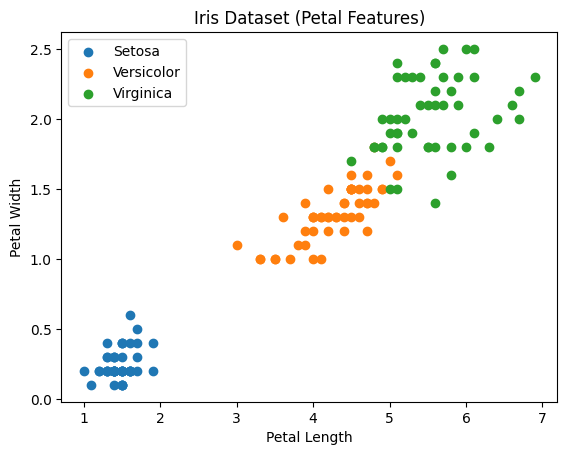

In [15]:
plt.scatter(setosa[:, 2], setosa[:, 3], label='Setosa')
plt.scatter(versicolor[:, 2], versicolor[:, 3], label='Versicolor')
plt.scatter(virginica[:, 2], virginica[:, 3], label='Virginica')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.title("Iris Dataset (Petal Features)")
plt.show()

## 🧠 Final Summary

You have learned how NumPy is used for:
- Real dataset loading
- Numerical computation
- Data preprocessing
- Core ML math

This is the foundation of all AI/ML pipelines.

---
## 📝 Practice Tasks for Students
1. Compute accuracy of the mini classifier on the full dataset.
2. Implement train-test split using NumPy only.
3. Try Manhattan distance instead of Euclidean distance.
4. Plot sepal features instead of petal features.
